In [1211]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [1212]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from scipy.stats import logistic,  loggamma, norm
from scipy.stats import ks_2samp, chi2_contingency

from statsmodels.graphics.gofplots import qqplot

import xgboost as xgb, lightgbm as lgbm, catboost as catb
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA 

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Загрузка данных

In [1213]:
# input
train = pd.read_csv("./Data/train.csv", sep=",")
test = pd.read_csv("./Data/test.csv", sep=",")

In [1678]:
# output
TRAIN_FULL_PATH = 'training_project_train_full.csv'
TRAIN_PART_PATH = 'training_project_train_part_b.csv'
TEST_PART_PATH = 'training_project_test_part.csv'
VALIDATION_PATH = 'KuznetsovVV_predictions.csv'

SCALER_FILE_PATH = 'scaler.pkl'

TARGET_NAME = 'Credit Default'

Исследование данных

In [1216]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [1217]:
test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [1218]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [1219]:
test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [1220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [1221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [1222]:
train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Проверка на выбросы

In [1223]:
train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

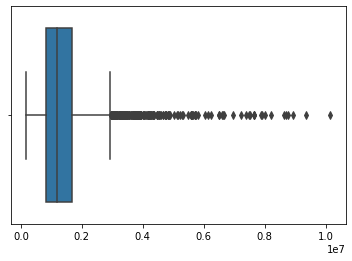

In [1224]:
sns.boxplot(x=train['Annual Income'].unique()) # Возможно

In [1225]:
train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [1226]:
train.loc[train['Years in current job'].isnull(), 'Years in current job'] = 'Nan'
test.loc[test['Years in current job'].isnull(), 'Years in current job'] = 'Nan'

In [1227]:
train['Tax Liens'].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [1228]:
train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

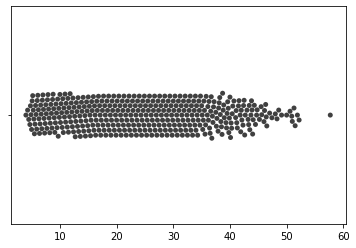

In [1229]:
sns.swarmplot(x=train['Years of Credit History'].unique(), color=".25") # Возможен 1 выброс

In [1230]:
train['Years of Credit History'].unique()

array([26.3, 15.3, 35. , 22.5, 13.6, 14.6, 20.3, 12. , 15.7, 24.6, 11.5,
       17.6, 14. , 17.7, 18.4, 17.8, 28.5, 29. , 12.5, 26.5, 34.4, 28.3,
       14.8, 25. , 29.8, 15.8, 14.5, 19.5, 18.6, 20.5, 21. , 10.2, 31.4,
       18. ,  7.6, 23.7, 15. , 10.9,  9.4, 15.4, 21.4, 27.3, 18.7, 17. ,
       22.2, 10.4,  9.5, 19.2, 16.3, 21.2, 10.7, 17.3, 12.9, 16. , 16.6,
       15.6, 13.3, 11.3, 17.5, 13.1, 12.1, 32.5, 12.7,  9. , 18.1, 36.8,
       16.5, 16.4, 17.2, 32. , 19.4, 16.9, 17.9,  6.1, 11.4, 20.6,  8.9,
       39.6,  8.5, 18.8, 31.3, 22.4, 11.9, 23.9, 16.7, 13.8, 15.2,  8. ,
       23.8, 12.2,  6. ,  6.4,  9.8, 10.3, 21.7, 13.2, 33.6, 14.3, 19.1,
       14.1, 23. , 15.5, 20.4, 20.7, 20.1,  9.7,  7.8, 16.8, 20.8, 33.7,
       14.2, 20.2, 31.7, 25.5, 23.3, 21.1, 14.7, 24.5, 39.3, 34. ,  4.8,
        9.1, 10.1, 23.4,  9.9, 19.7, 10.5, 29.4, 30. , 19.9,  8.8, 10.6,
       26. , 20.9, 26.8, 10.8, 25.7, 40.3, 14.4, 31. , 21.5, 26.4, 23.6,
       10. ,  9.6, 21.8, 23.1, 38.7, 26.6, 11.8, 24

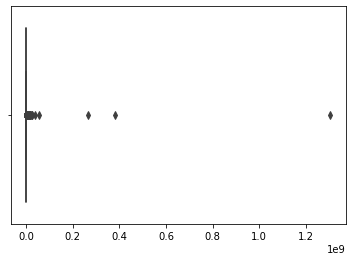

In [1231]:
sns.boxplot(train['Maximum Open Credit'].unique()) # - Вероятней всего выбросы

In [1232]:
train['Number of Credit Problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [1233]:
train['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [1234]:
train.loc[train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = -1
test.loc[test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = -1

In [1235]:
train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [1236]:
train.loc[train['Bankruptcies'].isnull(), 'Bankruptcies'] = -1
test.loc[test['Bankruptcies'].isnull(), 'Bankruptcies'] = -1

In [1237]:
train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [1238]:
train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

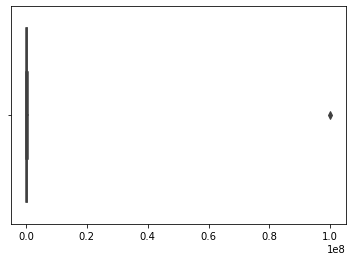

In [1239]:
sns.boxplot(train['Current Loan Amount'].unique()) #Выброс

Судя по графику видна закономерность.

In [1240]:
train['Current Loan Amount'].unique().max()

99999999.0

In [1241]:
train.loc[train['Current Loan Amount'] == 99999999.0].count() #Видимо системный выброс

Home Ownership                  870
Annual Income                   870
Years in current job            870
Tax Liens                       870
Number of Open Accounts         870
Years of Credit History         870
Maximum Open Credit             870
Number of Credit Problems       870
Months since last delinquent    870
Bankruptcies                    870
Purpose                         870
Term                            870
Current Loan Amount             870
Current Credit Balance          870
Monthly Debt                    870
Credit Score                    870
Credit Default                  870
dtype: int64

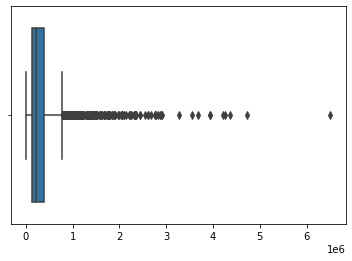

In [1242]:
sns.boxplot(train['Current Credit Balance'].unique()) # Возможно

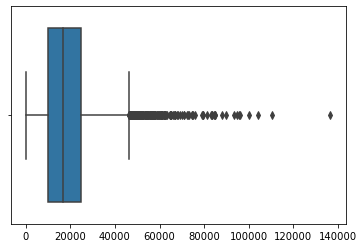

In [1243]:
sns.boxplot(train['Monthly Debt'].unique()) # Возможно

Проверка на работоспособность при данных без пропусков

In [1244]:
test['Bankruptcies'] = LabelEncoder().fit_transform(test['Bankruptcies'])
test['Home Ownership'] = LabelEncoder().fit_transform(test['Home Ownership'])
test['Years in current job'] = LabelEncoder().fit_transform(test['Years in current job'])
test['Purpose'] = LabelEncoder().fit_transform(test['Purpose'])
test['Term'] = LabelEncoder().fit_transform(test['Term'])

In [1245]:
train['Bankruptcies'] = LabelEncoder().fit_transform(train['Bankruptcies'])
train['Home Ownership'] = LabelEncoder().fit_transform(train['Home Ownership'])
train['Years in current job'] = LabelEncoder().fit_transform(train['Years in current job'])
train['Purpose'] = LabelEncoder().fit_transform(train['Purpose'])
train['Term'] = LabelEncoder().fit_transform(train['Term'])

In [1246]:
#test = pd.concat([test,pd.get_dummies(test['Bankruptcies'], prefix='Bankruptcies')],axis=1)
#test = pd.concat([test,pd.get_dummies(test['Home Ownership'], prefix='Home Ownership')],axis=1)
#test = pd.concat([test,pd.get_dummies(test['Years in current job'], prefix='Years in current job')],axis=1)
#test = pd.concat([test,pd.get_dummies(test['Purpose'], prefix='Purpose')],axis=1)
#test = pd.concat([test,pd.get_dummies(test['Term'], prefix='Term')],axis=1)

In [1247]:
#train = pd.concat([train,pd.get_dummies(train['Bankruptcies'], prefix='Bankruptcies')],axis=1)
#train = pd.concat([train,pd.get_dummies(train['Home Ownership'], prefix='Home Ownership')],axis=1)
#train = pd.concat([train,pd.get_dummies(train['Years in current job'], prefix='Years in current job')],axis=1)
#train = pd.concat([train,pd.get_dummies(train['Purpose'], prefix='Purpose')],axis=1)
#train = pd.concat([train,pd.get_dummies(train['Term'], prefix='Term')],axis=1)

Проверка на похожие индексы

In [1248]:
train.loc[(train['Current Loan Amount'] > 781450), 'Current Loan Amount'] /= 100

In [1249]:
test.loc[(test['Current Loan Amount'] > 781450), 'Current Loan Amount'] /= 100

In [1250]:
train_f = train.copy()
credit_default = train_f['Credit Default']
train_f.drop(['Credit Default'], axis='columns', inplace=True)
test_x = test.copy()
train_f = train_f.append(test_x)

In [1251]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                10000 non-null  int64  
 1   Annual Income                 7930 non-null   float64
 2   Years in current job          10000 non-null  int64  
 3   Tax Liens                     10000 non-null  float64
 4   Number of Open Accounts       10000 non-null  float64
 5   Years of Credit History       10000 non-null  float64
 6   Maximum Open Credit           10000 non-null  float64
 7   Number of Credit Problems     10000 non-null  float64
 8   Months since last delinquent  10000 non-null  float64
 9   Bankruptcies                  10000 non-null  int64  
 10  Purpose                       10000 non-null  int64  
 11  Term                          10000 non-null  int64  
 12  Current Loan Amount           10000 non-null  float64
 13  Cu

In [1252]:
train_f.loc[(train_f.isnull().any(axis=1) != True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7930 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7930 non-null   int64  
 1   Annual Income                 7930 non-null   float64
 2   Years in current job          7930 non-null   int64  
 3   Tax Liens                     7930 non-null   float64
 4   Number of Open Accounts       7930 non-null   float64
 5   Years of Credit History       7930 non-null   float64
 6   Maximum Open Credit           7930 non-null   float64
 7   Number of Credit Problems     7930 non-null   float64
 8   Months since last delinquent  7930 non-null   float64
 9   Bankruptcies                  7930 non-null   int64  
 10  Purpose                       7930 non-null   int64  
 11  Term                          7930 non-null   int64  
 12  Current Loan Amount           7930 non-null   float64
 13  Cur

In [1253]:
X = train_f.loc[(train_f.isnull().any(axis=1) != True) & (train_f['Annual Income'] != -1)].drop(['Annual Income'], axis='columns')
y = train_f.loc[(train_f.isnull().any(axis=1) != True) & (train_f['Annual Income'] != -1)]['Annual Income']
X_val = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Annual Income'] != -1)].drop(['Annual Income'], axis='columns')
y_val = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Annual Income'] != -1)]['Annual Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [1254]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5551 entries, 816 to 1474
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                5551 non-null   int64  
 1   Years in current job          5551 non-null   int64  
 2   Tax Liens                     5551 non-null   float64
 3   Number of Open Accounts       5551 non-null   float64
 4   Years of Credit History       5551 non-null   float64
 5   Maximum Open Credit           5551 non-null   float64
 6   Number of Credit Problems     5551 non-null   float64
 7   Months since last delinquent  5551 non-null   float64
 8   Bankruptcies                  5551 non-null   int64  
 9   Purpose                       5551 non-null   int64  
 10  Term                          5551 non-null   int64  
 11  Current Loan Amount           5551 non-null   float64
 12  Current Credit Balance        5551 non-null   float64
 13  M

In [1255]:
model = CatBoostRegressor(iterations=900, learning_rate=0.01, depth=9, verbose=False)
# Fit model
model.fit(X_train, y_train)
# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test.values)


print('R2 оценка точности')
r2 = r2_score(y_test.values, y_test_pred)
print('Выбрана модель с точностью ' + str(r2))

R2 оценка точности
Выбрана модель с точностью 0.4327802964936942


In [1256]:
y_val_pred = model.predict(X_val)
X_val['Annual Income'] = pd.Series(data=y_val_pred, index=y_val.index, name="Annual Income")

In [1257]:
X = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Annual Income'] != -1)]
X2 = pd.Series(data=y_val_pred, index=X.index, name="Annual Income")
train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Annual Income'] != -1), 'Annual Income'] = X2

In [1258]:
train_f.loc[train_f['Credit Score'] > 1000, 'Credit Score'] /= 10

In [1259]:
X = train_f.loc[(train_f.isnull().any(axis=1) != True) & (train_f['Credit Score'] != -1)].drop(['Credit Score'], axis='columns')
y = train_f.loc[(train_f.isnull().any(axis=1) != True) & (train_f['Credit Score'] != -1)]['Credit Score']
X_val = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Credit Score'] != -1)].drop(['Credit Score'], axis='columns')
y_val = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Credit Score'] != -1)]['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [1260]:
model = CatBoostRegressor(iterations=1500, learning_rate=0.01, depth=7, verbose=False)
# Fit model
model.fit(X_train, y_train)
# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test.values)


print('R2 оценка точности')
r2 = r2_score(y_test.values, y_test_pred)
print('Выбрана модель с точностью ' + str(r2))

R2 оценка точности
Выбрана модель с точностью 0.3550831400588129


In [1261]:
y_val_pred = model.predict(X_val)
X_val['Credit Score'] = pd.Series(data=y_val_pred, index=y_val.index, name="Credit Score")

In [1262]:
X = train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Credit Score'] != -1)]
X2 = pd.Series(data=y_val_pred, index=X.index, name="Credit Score")
train_f.loc[(train_f.isnull().any(axis=1) == True) & (train_f['Credit Score'] != -1), 'Credit Score'] = X2

In [1536]:
train_f.loc[train_probe['Current Loan Amount'] == 999999.990000, 'Current Loan Amount'] = train_f.loc[train_probe['Current Loan Amount'] != 999999.990000]['Current Loan Amount'].median()


In [1537]:
train = train_f[:7500]
test = train_f[7500:]

In [1538]:
train['Credit Default'] = credit_default

Балансировка данных

In [1539]:
def balance_df_by_target(df, target_name):
    print(target_name)
    print(type(df[target_name]))
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [1540]:
df_for_balancing = train
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

Credit Default
<class 'pandas.core.series.Series'>


0    5387
1    4226
Name: Credit Default, dtype: int64

In [1541]:
#train.loc[train['Credit Score'] > 3000, 'Credit Score'] = train['Credit Score'] / 10 # Понижение с 0,30 до 0,12

In [1542]:
train_probe = train[(train.isnull().any(axis=1) != True)]

In [1543]:
test_probe = test[(test.isnull().any(axis=1) != True)]

In [1544]:
train.loc[train['Current Loan Amount'] > 781450].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 7497
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                870 non-null    int64  
 1   Annual Income                 870 non-null    float64
 2   Years in current job          870 non-null    int64  
 3   Tax Liens                     870 non-null    float64
 4   Number of Open Accounts       870 non-null    float64
 5   Years of Credit History       870 non-null    float64
 6   Maximum Open Credit           870 non-null    float64
 7   Number of Credit Problems     870 non-null    float64
 8   Months since last delinquent  870 non-null    float64
 9   Bankruptcies                  870 non-null    int64  
 10  Purpose                       870 non-null    int64  
 11  Term                          870 non-null    int64  
 12  Current Loan Amount           870 non-null    float64
 13  Curr

In [1545]:
#train_x = train[(train.isnull().any(axis=1) != True) & (train['Current Loan Amount'] < 781450)]
#train_x = train_x.drop(["Credit Default"], axis = 1)

In [1546]:
#test_x = test[(test.isnull().any(axis=1) != True) & (test['Current Loan Amount'] < 781450)]

In [1547]:
#X_train_x = train_x.drop(["Current Loan Amount"], axis = 1)
#y_train_x = train_x["Current Loan Amount"]

In [1548]:
#train_x.info()

In [1549]:
CAT_FEATURE_NAMES = [
    'Home Ownership_0',
    'Home Ownership_1',
    'Home Ownership_2',
    'Home Ownership_3',
    'Tax Liens', 
    'Number of Open Accounts', 
    'Number of Credit Problems', 
    'Months since last delinquent', 
    'Bankruptcies_0',
    'Bankruptcies_1', 
    'Bankruptcies_2',
    'Bankruptcies_3',
    'Bankruptcies_4',
    'Bankruptcies_5', 
    'Years in current job_0',
    'Years in current job_1',
    'Years in current job_2',
    'Years in current job_3',
    'Years in current job_4',
    'Years in current job_5',
    'Years in current job_6',
    'Years in current job_7',
    'Years in current job_8',
    'Years in current job_9',
    'Years in current job_10',
    'Purpose_0',
    'Purpose_1',
    'Purpose_2',
    'Purpose_3',
    'Purpose_4',
    'Purpose_5',
    'Purpose_6',
    'Purpose_7',
    'Purpose_8',
    'Purpose_9',
    'Purpose_10',
    'Purpose_11',
    'Purpose_12',
    'Purpose_13',
    'Term_0', 
    'Term_1']

In [1550]:
CAT_FEATURE_NAMES = [
    'Home Ownership',
    'Tax Liens', 
    'Number of Open Accounts', 
    'Number of Credit Problems', 
    'Months since last delinquent', 
    'Bankruptcies', 
    'Years in current job',
    'Purpose',
    'Term']

In [1551]:
#cbX_train = X_train_x.copy()
#cbX_test = X_test_x.copy()
#
#for colname in CAT_FEATURE_NAMES:
#    cbX_train[colname] = cbX_train[colname].astype('int') 
#    cbX_test[colname] = cbX_test[colname].astype('int') 
#    cbX_train[colname] = pd.Categorical(cbX_train[colname])
#    cbX_test[colname] = pd.Categorical(cbX_test[colname])
#    
#cbX_train.info()

In [1552]:
test_probe.loc[test_probe['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = test_probe['Current Loan Amount'].mean()

In [1553]:
train_probe.loc[train_probe['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = train_probe['Current Loan Amount'].mean()

In [1554]:
X_train_probe = train_probe.drop(["Credit Default"], axis = 1)
y_train_probe = train_probe["Credit Default"]

In [1555]:
ac = 0
model_ac = []

model = RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_probe, y_train_probe, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_forest_pred = model.predict(X_test)

print('R2 оценка точности')
r2 = r2_score(y_test, y_forest_pred)
    
if ac < r2:
    model_ac = model
    ac = r2
print(r2)
    
print('Выбрана модель с точностью ' + str(ac))

R2 оценка точности
0.11811980088387097
Выбрана модель с точностью 0.11811980088387097


In [1556]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
4664,3,2.820569e+06,10,0.0,10.0,20.3,481580.0,0.0,77.0,1,3,1,405416.00,173432.0,27030.0,749.000000
4411,3,4.417690e+05,10,0.0,5.0,12.6,49126.0,0.0,14.0,1,3,1,999999.99,1824.0,9535.0,733.000000
7448,3,1.065178e+06,8,0.0,12.0,24.4,562320.0,1.0,-1.0,2,3,1,224246.00,197657.0,14557.0,738.000000
1919,1,1.454507e+06,7,0.0,16.0,16.0,394900.0,0.0,15.0,1,3,1,999999.99,190988.0,21090.0,720.000000
1298,1,2.313288e+06,1,0.0,19.0,31.9,884268.0,0.0,41.0,1,3,1,321420.00,659832.0,52820.0,715.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,3,7.721529e+05,8,0.0,5.0,12.0,351186.0,0.0,-1.0,1,2,1,157190.00,73701.0,4054.0,731.085087
5226,3,4.288680e+06,5,0.0,10.0,25.0,650188.0,0.0,34.0,1,3,1,264836.00,183065.0,27626.0,748.000000
5390,3,7.419120e+05,2,0.0,9.0,9.3,678326.0,0.0,-1.0,1,3,1,279202.00,319276.0,15147.0,738.000000
860,3,3.926046e+06,3,0.0,8.0,13.0,349492.0,0.0,18.0,1,3,1,470272.00,280098.0,18093.0,742.000000


0.11811980088387097

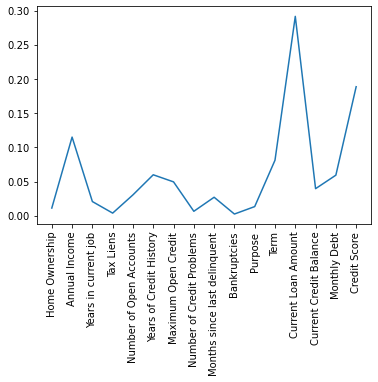

In [1557]:
plt.plot(model_ac.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90);
r2

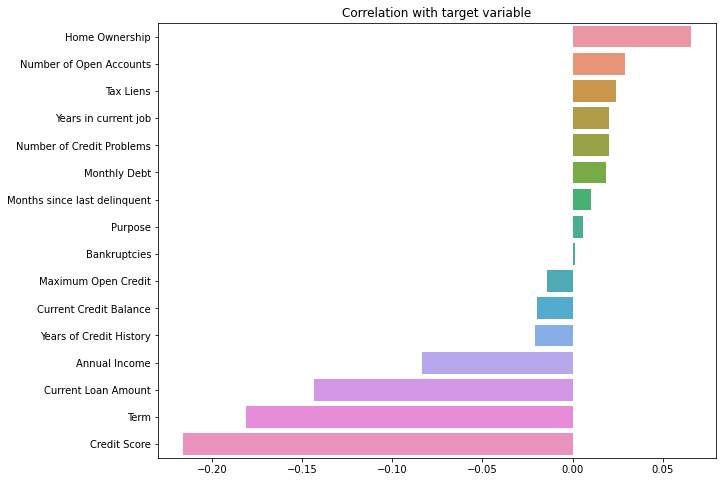

In [1558]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = train.columns.drop(TARGET_NAME).tolist()
corr_with_target = train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

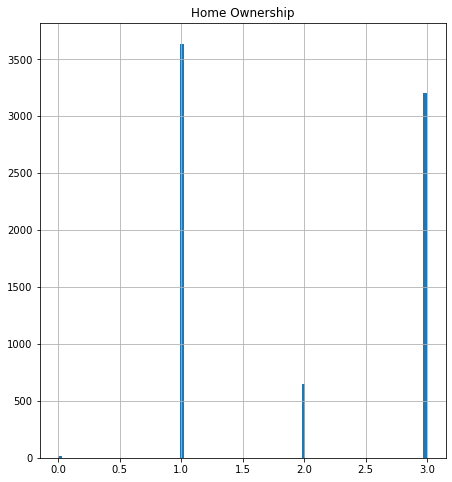

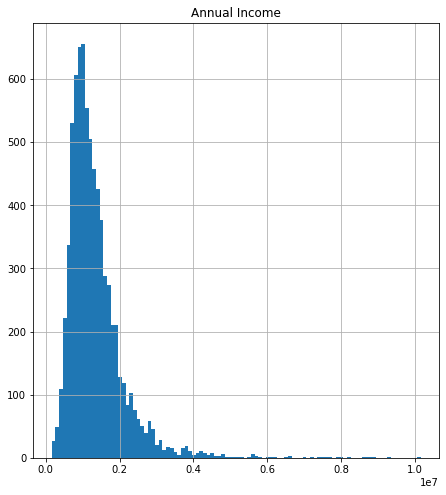

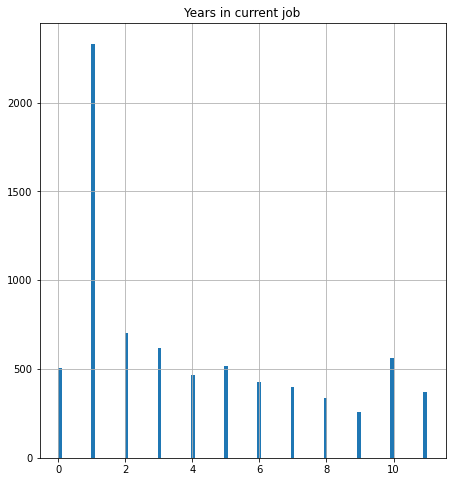

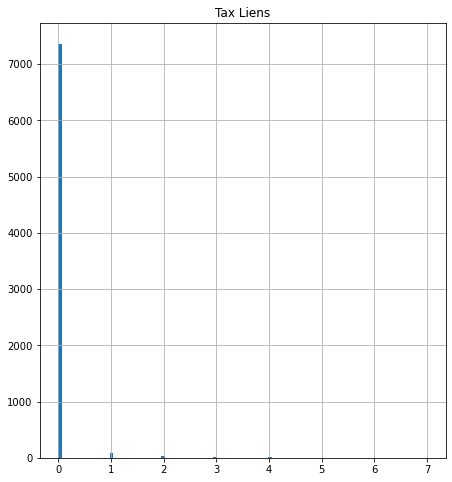

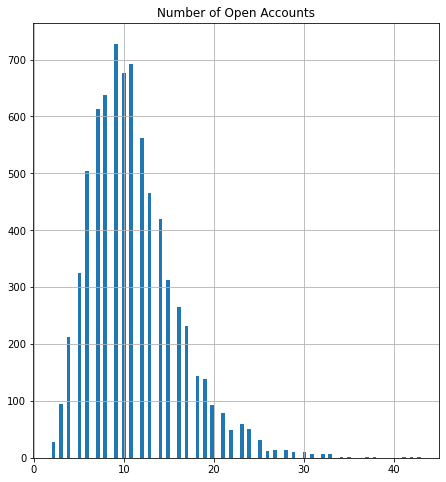

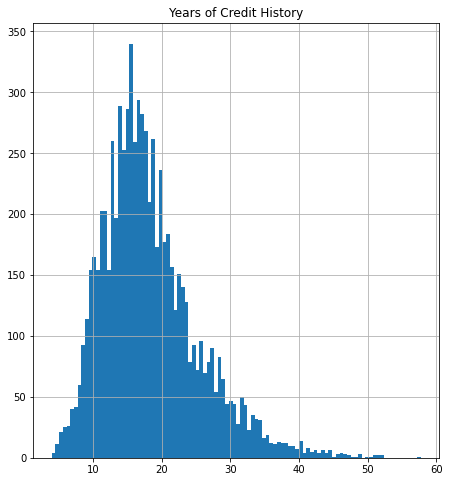

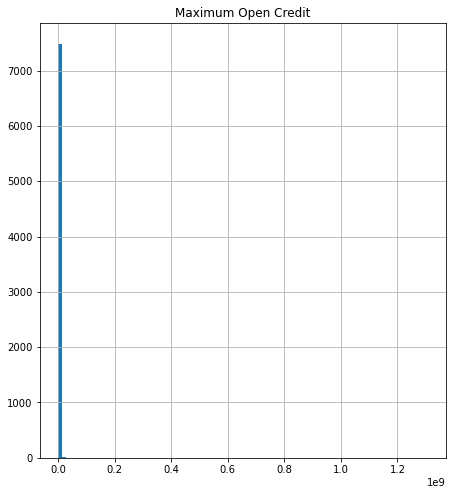

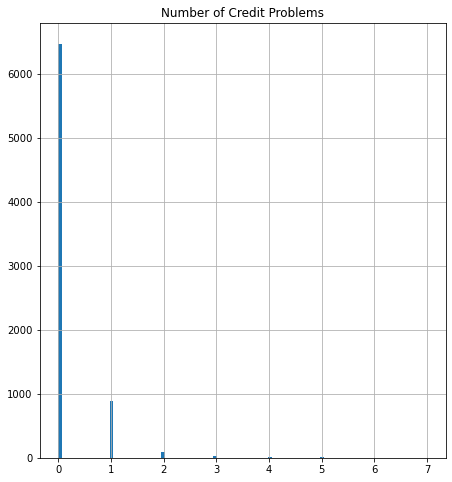

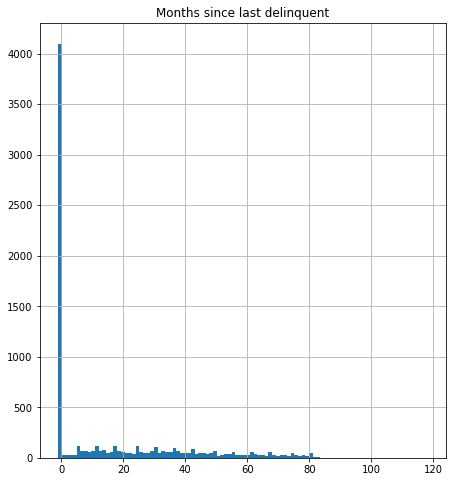

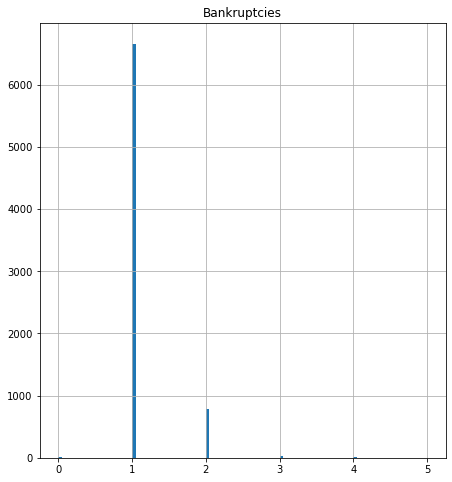

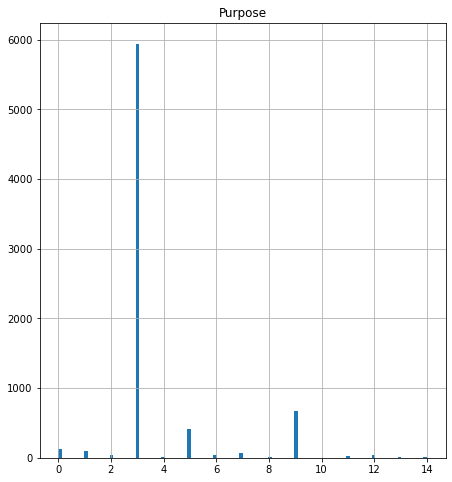

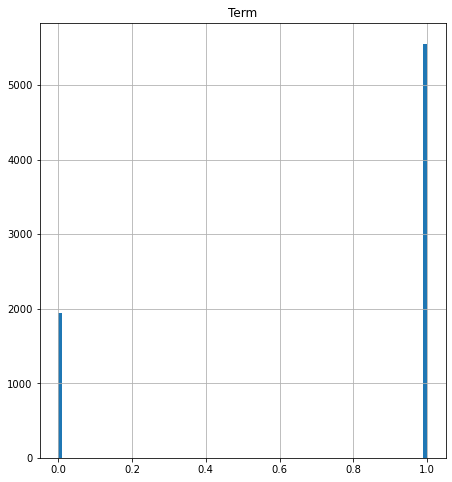

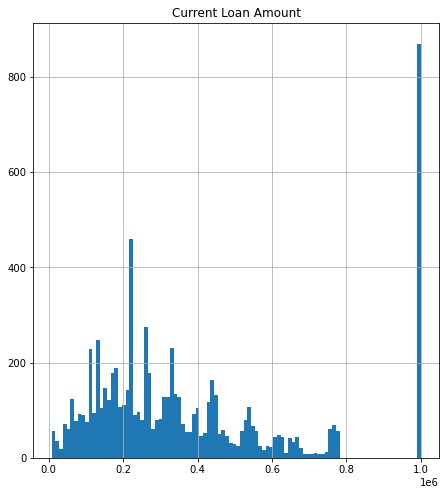

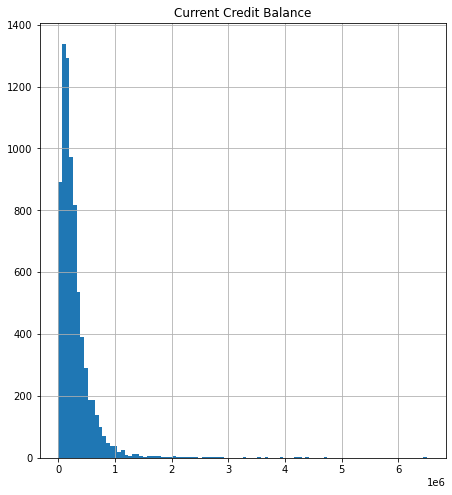

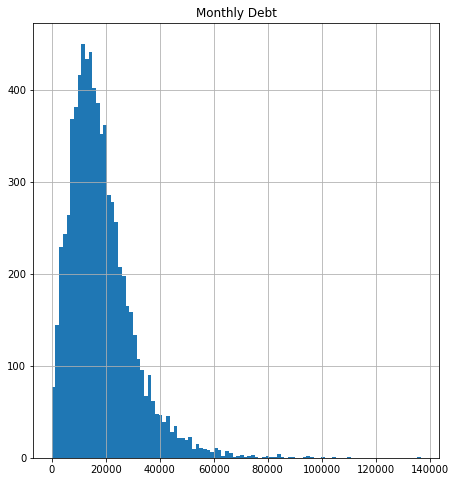

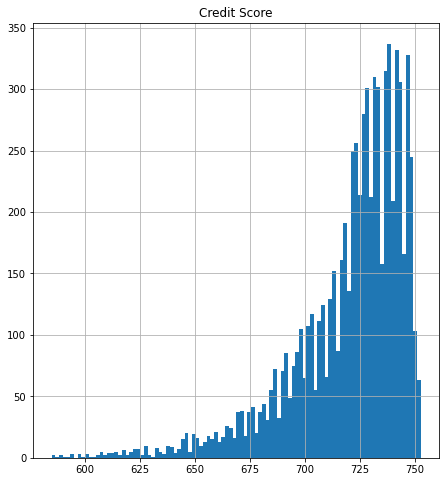

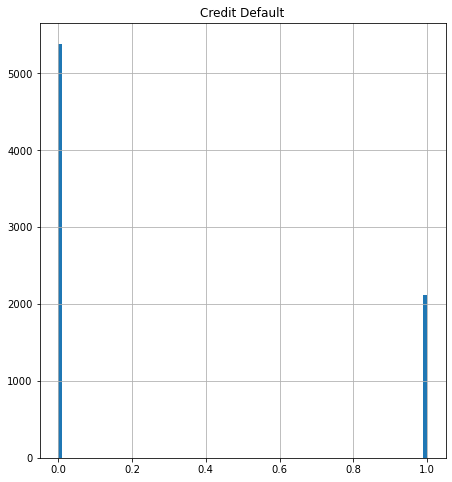

In [1559]:
for name in train.columns:
    plt.figure(figsize= (16, 8))

    plt.subplot(122)
    temp = train[name]
    temp.hist(bins = 100)
    
    plt.title(str(name))
    plt.show()

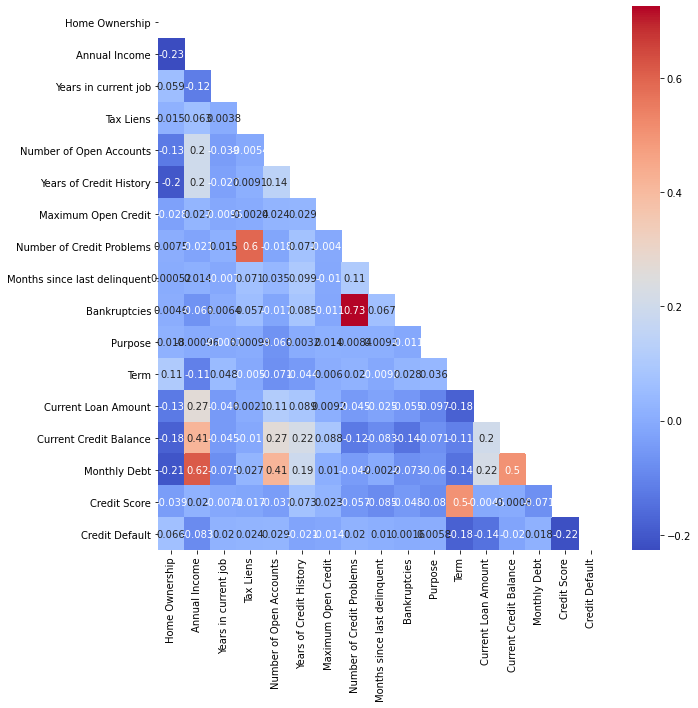

In [1560]:
fig, ax = plt.subplots(figsize=(10,10))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), annot=True, cmap= 'coolwarm', mask=matrix, ax=ax)

Возможные корреляции
- Bankruptcies + Number of Credit Problems
- Monthly Debt + Annual Income
- Monthly Debt + Tax Liens
- Monthly Debt + Current Credit Balance
- Current Credit Balance + Annual Income

In [1561]:
#xx = train['Current Credit Balance']
#yy = train['Annual Income'] / 5
xx = np.log(train['Number of Open Accounts'] / 0.6)
yy = np.log(train['Years of Credit History'])

#xx = train['Monthly Debt']
#yy = train['Current Credit Balance']

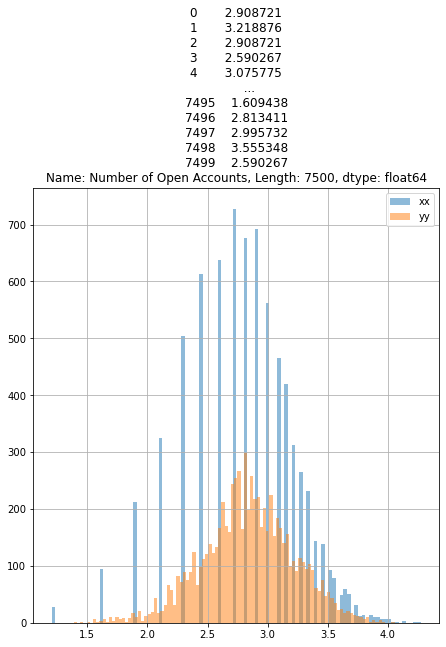

In [1562]:
plt.figure(figsize= (16, 8))

plt.subplot(122)
(xx).hist(alpha=0.5, label='xx', bins = 100)
(yy).hist(alpha=0.5, label='yy', bins = 100)

plt.title(str(xx))
plt.legend()
plt.show()

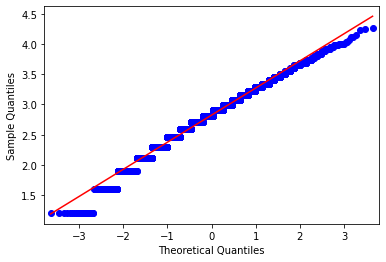

In [1563]:
# q-q plot
qqplot(xx, line='s')
plt.show()

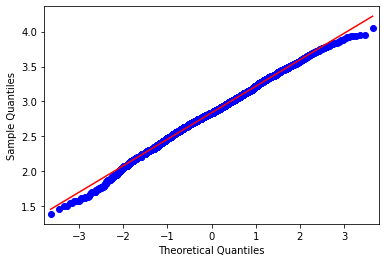

In [1564]:
# q-q plot
qqplot(yy, line='s')
plt.show()

In [1565]:
# Шапиро-Уилк
c,p = shapiro(xx)
print(c, p)

#D’Agostino’s K2 test
c,p = normaltest(xx)
print(p)

# Колмогоров-Смирнов
c,p = kstest(xx, 'norm')
print(p)

0.9871752858161926 1.6178159124689144e-25
1.5533507605018778e-39
0.0


logistic :  1.6178159124689144e-25 1.5533507605018778e-39 0.0


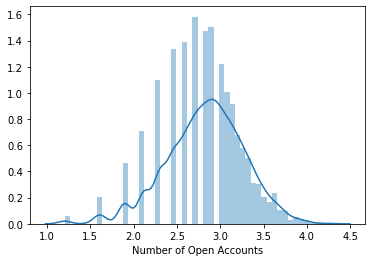

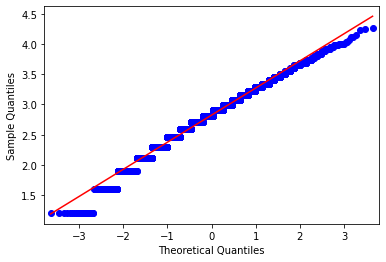

loggamma : 6.589366274845077e-10 2.7840158029163166e-08 0.0


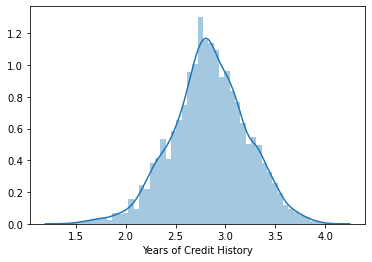

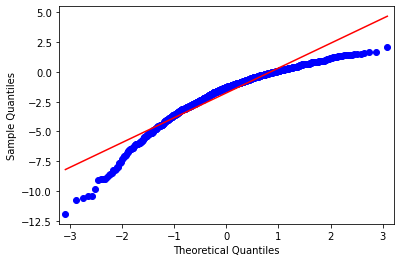

In [1566]:
c = 0.5
r2 = loggamma.rvs(c, size=1000)
r1 = logistic.rvs(size=1000)

c,p11 = shapiro(xx)
c,p12 = normaltest(xx)
c,p13 = kstest(xx, 'norm')
print('logistic : ',p11,p12,p13)

sns.distplot(xx)
plt.show()
qqplot(xx, line='s')
plt.show()

c,p21 = shapiro(yy)
c,p22 = normaltest(yy)
c,p23 = kstest(yy, 'norm')
print('loggamma :',p21,p22,p23)


sns.distplot(yy)
plt.show()
qqplot(r2, line='s')
plt.show()

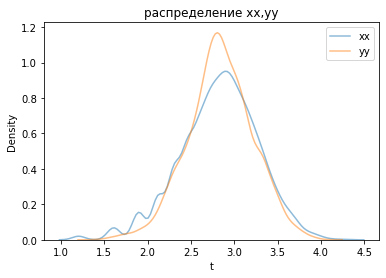

In [1567]:
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(yy,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Приведенные график к нормальному распределению указывают на возможную зависимость. Необходимо проверить на шумы.

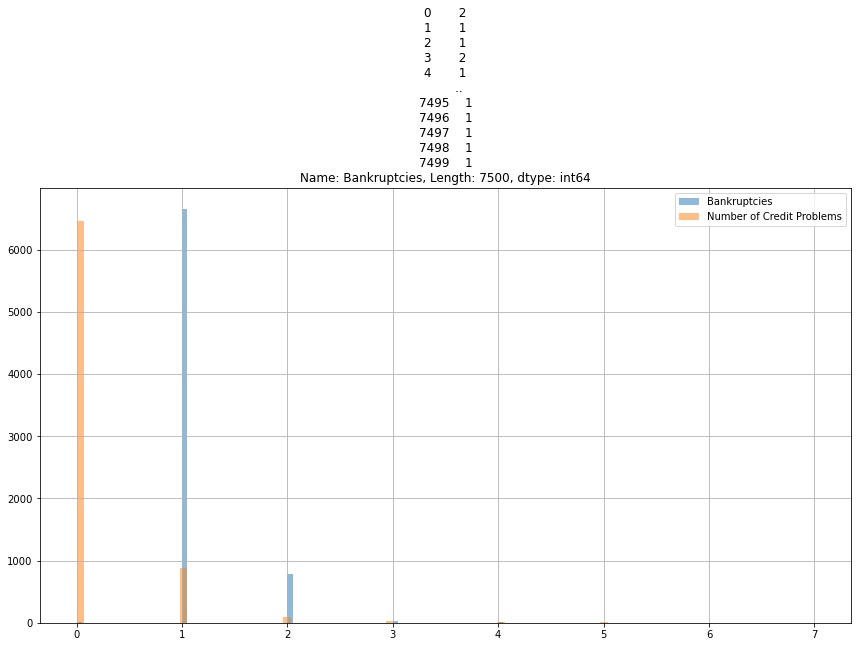

In [1568]:
xx1 = (train['Bankruptcies'])
yy1 = (train['Number of Credit Problems'])
plt.figure(figsize= (32, 8))

plt.subplot(122)
(xx1).hist(alpha=0.5, label='Bankruptcies', bins = 100)
(yy1).hist(alpha=0.5, label='Number of Credit Problems', bins = 100)

plt.title(str(xx1))
plt.legend()
plt.show()

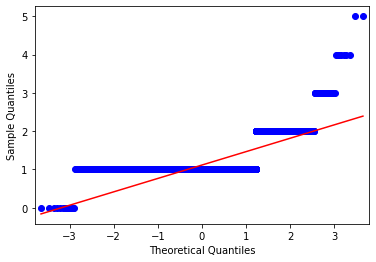

In [1569]:
# q-q plot
qqplot(xx1, line='s')
plt.show()

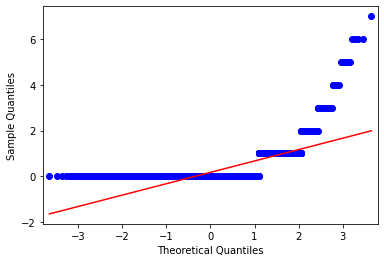

In [1570]:
# q-q plot
qqplot(yy1, line='s')
plt.show()

Явное повторение.

No handles with labels found to put in legend.


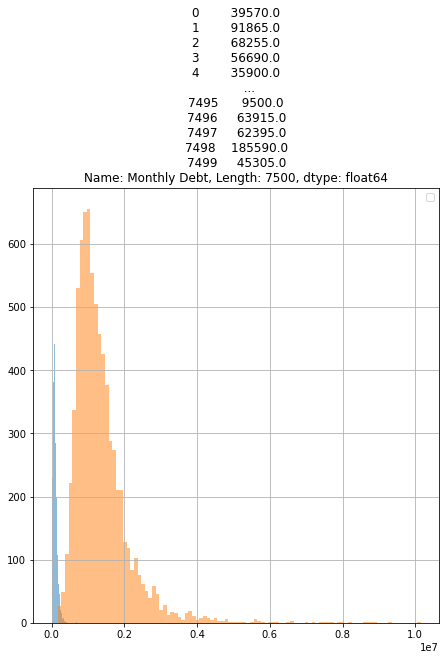

In [1571]:
plt.figure(figsize= (16, 8))

xx2 = train['Monthly Debt']*5
yy2 = train['Annual Income']

plt.subplot(122)
xx2.hist(alpha=0.5, bins = 100)
yy2.hist(alpha=0.5, bins = 100)

plt.title(str(xx2))
plt.legend()
plt.show()

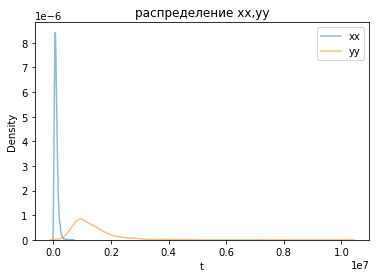

In [1572]:
sns.kdeplot(xx2,alpha=0.5,label='xx')
sns.kdeplot(yy2,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Возможно есть корреляция, но возможно ее нет

In [1573]:
ks_2samp(xx,yy)

KstestResult(statistic=0.08586666666666666, pvalue=1.8086884001585272e-24)

In [1574]:
ks_2samp(xx1,yy1)

KstestResult(statistic=0.8606666666666667, pvalue=0.0)

In [1575]:
ks_2samp(xx2,yy2)

KstestResult(statistic=0.9872, pvalue=0.0)

In [1576]:
pca = PCA(n_components=2)
X = pca.fit_transform(train_probe.loc[:,['Bankruptcies', 'Number of Credit Problems','Monthly Debt', 'Annual Income', 'Tax Liens', 'Current Credit Balance']].values)

In [1577]:
pca_test = PCA(n_components=2)
X2 = pca_test.fit_transform(test_probe.loc[:,['Bankruptcies', 'Number of Credit Problems','Monthly Debt', 'Annual Income', 'Tax Liens', 'Current Credit Balance']].values)

In [1578]:
X

array([[-894367.65712262,  -75702.03027667],
       [-295244.3885092 ,  163576.21136309],
       [-580741.0001081 ,  130038.44246541],
       ...,
       [ 558443.71492868,   84383.12235037],
       [ 512824.24680165,   91623.02521763],
       [-657631.37528565,  124145.8829743 ]])

In [1579]:
test_probe['new_f1_pca']=X2[:,0]
test_probe['new_f2_pca']=X2[:,1]

In [1580]:
train_probe['new_f1_pca']=X[:,0]
train_probe['new_f2_pca']=X[:,1]

In [1581]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [1585]:
SELECTED_FEATURE_NAMES = [a for a in list(train_probe) if a != TARGET_NAME]

In [1586]:
NUM_FEATURE_NAMES = [a for a in SELECTED_FEATURE_NAMES if a not in CAT_FEATURE_NAMES]

### Приведение типов для модели CatBoost

In [1587]:
for colname in CAT_FEATURE_NAMES:
    train_probe[colname] = pd.Categorical(train_probe[colname])
    
train_probe[CAT_FEATURE_NAMES].dtypes

Home Ownership                  category
Tax Liens                       category
Number of Open Accounts         category
Number of Credit Problems       category
Months since last delinquent    category
Bankruptcies                    category
Years in current job            category
Purpose                         category
Term                            category
dtype: object

### Нормализация данных<a class="anchor" id="normalization"></a>

In [1588]:
scaler = StandardScaler()

df_norm = train_probe.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [1589]:
scaler = StandardScaler()

df_norm = test_probe.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df_test = df_norm.copy()

In [1590]:
NUM_FEATURE_NAMES

['Annual Income',
 'Years of Credit History',
 'Maximum Open Credit',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'new_f1_pca',
 'new_f2_pca']

**Сохранение модели для нормализации данных**

In [1591]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

### Разбиение на train и test<a class="anchor" id="train_and_test"></a>

In [1592]:
X = train_probe[SELECTED_FEATURE_NAMES]
y = train_probe[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

### Балансировка целевой переменной<a class="anchor" id="target_balancing"></a>

### Сохранение обучающего и тестового датасетов<a class="anchor" id="train_test_saving"></a> 

In [1593]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [1594]:
df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

### Построение и оценка базовых моделей<a class="anchor" id="baseline_modeling"></a> 

**Логистическая регрессия**

In [1595]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      3771
           1       0.32      0.00      0.01      1479

    accuracy                           0.72      5250
   macro avg       0.52      0.50      0.42      5250
weighted avg       0.61      0.72      0.60      5250

TEST

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1616
           1       0.25      0.00      0.01       634

    accuracy                           0.72      2250
   macro avg       0.48      0.50      0.42      2250
weighted avg       0.59      0.72      0.60      2250

CONFUSION MATRIX

col_0              0  1
Credit Default         
0               1607  9
1                631  3


**k ближайших соседей**

In [1596]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3771
           1       0.65      0.41      0.50      1479

    accuracy                           0.77      5250
   macro avg       0.72      0.66      0.68      5250
weighted avg       0.76      0.77      0.75      5250

TEST

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1616
           1       0.38      0.24      0.29       634

    accuracy                           0.67      2250
   macro avg       0.56      0.54      0.54      2250
weighted avg       0.64      0.67      0.65      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1365  251
1                482  152


**Бустинговые алгоритмы**

*XGBoost*

In [1597]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca
3910,1,6.828980e+05,11,0.0,9.0,29.5,565664.0,0.0,10.0,1,3,1,175714.0,116755.0,2840.0,742.000000,-6.841537e+05,-4.538774e+04
3689,1,7.863530e+05,1,0.0,9.0,9.6,160490.0,0.0,-1.0,1,3,1,216788.0,126958.0,14482.0,702.000000,-5.805200e+05,-5.470954e+04
4452,3,1.158354e+06,2,0.0,11.0,23.0,225412.0,0.0,14.0,1,3,1,223542.0,153786.0,27028.0,730.000000,-2.100059e+05,-9.819738e+04
6971,1,1.168595e+06,1,0.0,15.0,17.5,536998.0,0.0,-1.0,1,3,1,450516.0,216581.0,17042.0,745.000000,-1.882383e+05,-3.854896e+04
2982,1,8.796761e+05,5,0.0,9.0,11.4,203390.0,0.0,-1.0,1,9,1,21626.0,155458.0,6428.0,712.685980,-4.835833e+05,-4.434806e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,1,1.486284e+06,8,0.0,14.0,18.7,252670.0,0.0,29.0,1,5,0,323796.0,94696.0,25005.0,686.731073,1.009377e+05,-2.179200e+05
772,1,1.291328e+06,1,0.0,8.0,16.9,694562.0,0.0,-1.0,1,3,0,492118.0,448077.0,16048.0,702.804036,-2.419424e+04,1.657149e+05
5944,1,2.365367e+06,5,0.0,16.0,23.6,3007136.0,0.0,-1.0,1,1,1,152152.0,1742642.0,47347.0,742.000000,1.274285e+06,1.235442e+06
5327,1,8.559690e+05,1,0.0,10.0,22.0,484990.0,0.0,-1.0,1,3,0,495022.0,332158.0,12982.0,655.000000,-4.735909e+05,1.337128e+05


In [1598]:
xgbX_train = X_train.copy()
xgbX_test = X_test.copy()

for colname in CAT_FEATURE_NAMES:
    xgbX_train[colname] = xgbX_train[colname].astype('int') 
    xgbX_test[colname] = xgbX_test[colname].astype('int') 

In [1599]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(xgbX_train, y_train)

y_train_pred = model_xgb.predict(xgbX_train)
y_test_pred = model_xgb.predict(xgbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3771
           1       0.99      0.89      0.94      1479

    accuracy                           0.97      5250
   macro avg       0.98      0.94      0.96      5250
weighted avg       0.97      0.97      0.97      5250

TEST

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1616
           1       0.43      0.27      0.33       634

    accuracy                           0.69      2250
   macro avg       0.59      0.57      0.57      2250
weighted avg       0.66      0.69      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1389  227
1                461  173


*LightGBM*

In [1600]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3771
           1       0.98      0.74      0.84      1479

    accuracy                           0.92      5250
   macro avg       0.94      0.87      0.90      5250
weighted avg       0.93      0.92      0.92      5250

TEST

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1616
           1       0.47      0.24      0.32       634

    accuracy                           0.71      2250
   macro avg       0.61      0.57      0.57      2250
weighted avg       0.67      0.71      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1442  174
1                481  153


*CatBoost*

In [1601]:
X_train['Tax Liens'].dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=False)

In [1602]:
cat_features=[pos for (pos, v) in enumerate(SELECTED_FEATURE_NAMES) if v in CAT_FEATURE_NAMES]
print(cat_features)

[0, 2, 3, 4, 7, 8, 9, 10, 11]


In [1603]:
X_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca
3910,1,6.828980e+05,11,0.0,9.0,29.5,565664.0,0.0,10.0,1,3,1,175714.0,116755.0,2840.0,742.000000,-6.841537e+05,-4.538774e+04
3689,1,7.863530e+05,1,0.0,9.0,9.6,160490.0,0.0,-1.0,1,3,1,216788.0,126958.0,14482.0,702.000000,-5.805200e+05,-5.470954e+04
4452,3,1.158354e+06,2,0.0,11.0,23.0,225412.0,0.0,14.0,1,3,1,223542.0,153786.0,27028.0,730.000000,-2.100059e+05,-9.819738e+04
6971,1,1.168595e+06,1,0.0,15.0,17.5,536998.0,0.0,-1.0,1,3,1,450516.0,216581.0,17042.0,745.000000,-1.882383e+05,-3.854896e+04
2982,1,8.796761e+05,5,0.0,9.0,11.4,203390.0,0.0,-1.0,1,9,1,21626.0,155458.0,6428.0,712.685980,-4.835833e+05,-4.434806e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,1,1.486284e+06,8,0.0,14.0,18.7,252670.0,0.0,29.0,1,5,0,323796.0,94696.0,25005.0,686.731073,1.009377e+05,-2.179200e+05
772,1,1.291328e+06,1,0.0,8.0,16.9,694562.0,0.0,-1.0,1,3,0,492118.0,448077.0,16048.0,702.804036,-2.419424e+04,1.657149e+05
5944,1,2.365367e+06,5,0.0,16.0,23.6,3007136.0,0.0,-1.0,1,1,1,152152.0,1742642.0,47347.0,742.000000,1.274285e+06,1.235442e+06
5327,1,8.559690e+05,1,0.0,10.0,22.0,484990.0,0.0,-1.0,1,3,0,495022.0,332158.0,12982.0,655.000000,-4.735909e+05,1.337128e+05


In [1625]:
cbX_train = X_train.copy()
cbX_test = X_test.copy()
cb_test = test_probe.copy()

for colname in CAT_FEATURE_NAMES:
    cbX_train[colname] = cbX_train[colname].astype('int') 
    cbX_test[colname] = cbX_test[colname].astype('int') 
    cb_test[colname] = cb_test[colname].astype('int') 
    
    cbX_train[colname] = pd.Categorical(cbX_train[colname])
    cbX_test[colname] = pd.Categorical(cbX_test[colname])
    cb_test[colname] = pd.Categorical(cb_test[colname])
    
cbX_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 3910 to 7113
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                5250 non-null   category
 1   Annual Income                 5250 non-null   float64 
 2   Years in current job          5250 non-null   category
 3   Tax Liens                     5250 non-null   category
 4   Number of Open Accounts       5250 non-null   category
 5   Years of Credit History       5250 non-null   float64 
 6   Maximum Open Credit           5250 non-null   float64 
 7   Number of Credit Problems     5250 non-null   category
 8   Months since last delinquent  5250 non-null   category
 9   Bankruptcies                  5250 non-null   category
 10  Purpose                       5250 non-null   category
 11  Term                          5250 non-null   category
 12  Current Loan Amount           5250 non-null  

In [1605]:
model_catb = catb.CatBoostClassifier(iterations=142, silent=True, cat_features=CAT_FEATURE_NAMES)
model_catb.fit(cbX_train, y_train, verbose=False)

y_train_pred = model_catb.predict(cbX_train)
y_test_pred = model_catb.predict(cbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3771
           1       0.76      0.25      0.38      1479

    accuracy                           0.77      5250
   macro avg       0.76      0.61      0.62      5250
weighted avg       0.77      0.77      0.72      5250

TEST

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1616
           1       0.54      0.18      0.28       634

    accuracy                           0.73      2250
   macro avg       0.65      0.56      0.55      2250
weighted avg       0.69      0.73      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1518   98
1                517  117


### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a> 

In [1606]:
model_catb_ = catb.CatBoostClassifier(class_weights=[1, 3.5], random_state=21, cat_features=CAT_FEATURE_NAMES )
#model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)
model_catb.fit(cbX_train, y_train,
          verbose=False)

y_train_pred = model_catb.predict(cbX_train)
y_test_pred = model_catb.predict(cbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3771
           1       0.76      0.25      0.38      1479

    accuracy                           0.77      5250
   macro avg       0.76      0.61      0.62      5250
weighted avg       0.77      0.77      0.72      5250

TEST

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1616
           1       0.54      0.18      0.28       634

    accuracy                           0.73      2250
   macro avg       0.65      0.56      0.55      2250
weighted avg       0.69      0.73      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1518   98
1                517  117


**Подбор гиперпараметров**

In [1607]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

In [1608]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [1609]:
params

{'n_estimators': [50, 100, 200, 500, 700, 1000, 1200, 1500],
 'max_depth': [3, 5, 7]}

In [1610]:
%%time

rs = RandomizedSearchCV(model_xgb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(xgbX_train, y_train)

CPU times: user 14.9 s, sys: 378 ms, total: 15.3 s
Wall time: 24.4 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=21,
                                           reg_alpha=0, reg_l

In [1611]:
rs.best_params_

{'n_estimators': 1500, 'max_depth': 3}

In [1612]:
rs.best_score_

0.36220544336852495

In [1613]:
from catboost import Pool,cv

In [1614]:
c_dataset = Pool(data=cbX_train,
                  label=y_train,
                  cat_features=CAT_FEATURE_NAMES)


params = {"iterations": 150,
          
          "max_depth":3,
          "eval_metric":"F1",
          "l2_leaf_reg":10.0,
          "loss_function": "Logloss",
          "colsample_bylevel":0.5,
          "verbose": False}
scores = cv(c_dataset,
            params,
            fold_count=3, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [1615]:

params = {"iterations": 150,
          "max_depth":10,
          "class_weights":[1,3.5],
          "eval_metric":"F1",
          "l2_leaf_reg":10.0,
          "loss_function": "Logloss",
          "colsample_bylevel":0.5,
          #"ignored_features":ind_to_del,
          "verbose": False}
scores = cv(c_dataset,
            params,
            fold_count=3, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [1616]:
catb_model_grid = catb.CatBoostClassifier(cat_features=CAT_FEATURE_NAMES,iterations=150,eval_metric="F1",loss_function="Logloss",colsample_bylevel=0.5,
          class_weights=[1,3.5],verbose=False)
grid = {'depth': [2,3,4, 5, 10],
        'l2_leaf_reg': [10, 3]}
grid_search_result = catb_model_grid.grid_search(grid, 
                                       X=cbX_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7471061409
bestIteration = 9

0:	loss: 0.7471061	best: 0.7471061 (0)	total: 340ms	remaining: 3.06s

bestTest = 0.7444108761
bestIteration = 33

1:	loss: 0.7444109	best: 0.7471061 (0)	total: 681ms	remaining: 2.72s

bestTest = 0.7475592748
bestIteration = 21

2:	loss: 0.7475593	best: 0.7475593 (2)	total: 981ms	remaining: 2.29s

bestTest = 0.7488244514
bestIteration = 5

3:	loss: 0.7488245	best: 0.7488245 (3)	total: 1.36s	remaining: 2.04s

bestTest = 0.7486783245
bestIteration = 15

4:	loss: 0.7486783	best: 0.7488245 (3)	total: 1.74s	remaining: 1.74s

bestTest = 0.7481134
bestIteration = 25

5:	loss: 0.7481134	best: 0.7488245 (3)	total: 2.07s	remaining: 1.38s

bestTest = 0.7432624113
bestIteration = 4

6:	loss: 0.7432624	best: 0.7488245 (3)	total: 2.39s	remaining: 1.02s

bestTest = 0.7492398135
bestIteration = 10

7:	loss: 0.7492398	best: 0.7492398 (7)	total: 2.7s	remaining: 674ms

bestTest = 0.7462749213
bestIteration = 5

8:	loss: 0.7462749	best: 0.7492398 (7)	total: 3.38s

In [1617]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectFromModel, SelectKBest

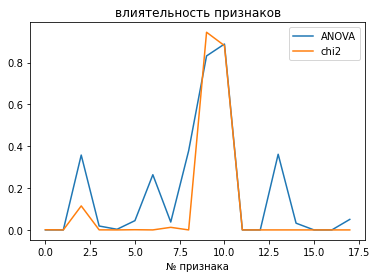

In [1618]:
rez_c = chi2(np.abs(cbX_train),y_train)
rez_f = f_classif(cbX_train,y_train)

plt.plot(rez_f[1], label= 'ANOVA')
plt.plot(rez_c[1],label='chi2')
plt.title('влиятельность признаков')
plt.xlabel('№ признака')
plt.legend()
plt.show()

<BarContainer object of 18 artists>

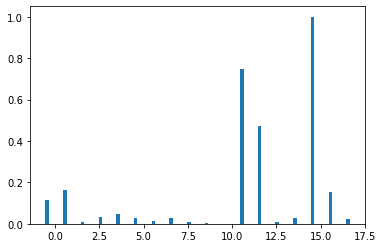

In [1619]:
selector = SelectKBest(f_classif, k=4)
selector.fit(cbX_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(np.arange(cbX_train.shape[-1]) - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

In [1620]:
ind_select =  np.where(selector.pvalues_>0.01)[0]
print(cbX_train.columns[ind_select])

Index(['Years in current job', 'Tax Liens', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose',
       'Current Credit Balance', 'Monthly Debt', 'new_f2_pca'],
      dtype='object')


In [1621]:
# определение списка лучших признаков по модели
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [1626]:
cbX_test_2 = cbX_test.copy()
cbX_train_2 = cbX_train.copy()
cb_test_2 = cb_test.copy()

In [1627]:
def create_new_featurs(featur_names, df):
    for cat_1 in featur_names:
        for cat_2 in featur_names:
            if cat_1 != cat_2:
                df[cat_1 + "_log"] = np.log(1 + df[cat_1])
                df[cat_1 + "_sqrt"] = np.sqrt(2/3 + df[cat_1])
                df[cat_1 + "_min"] = np.min(df[cat_1])
                df[cat_1 + "_max"] = np.min(df[cat_1])
                df[cat_1 + "_mean"] = np.mean(df[cat_1])
                df[cat_1 + "_class"] = np.round(df[cat_1] / (np.max(df[cat_1]-0.000000001) / 9), 0)
                df[cat_1 + "_n"] = (df[cat_1] / df[cat_2]-0.000000001)-0.000000001
                df[cat_1 + "_o"] = (df[cat_1] + df[cat_2])-0.000000001
                df[cat_1 + "_p"] = (df[cat_1] - df[cat_2])-0.000000001
                
#cbX_train_2['Test_1'] = cbX_train_2['Current Loan Amount'] * cbX_train_2['Credit Score']
#cbX_test_2['Test_1'] = cbX_test_2['Current Loan Amount'] * cbX_test_2['Credit Score']
#cbX_train_2['Test_2'] = np.log(cbX_train['Current Loan Amount'])
#cbX_test_2['Test_2'] = np.log(cbX_test['Current Loan Amount'])

In [1628]:
create_new_featurs(NUM_FEATURE_NAMES, cbX_test_2)
create_new_featurs(NUM_FEATURE_NAMES, cbX_train_2)
create_new_featurs(NUM_FEATURE_NAMES, cb_test_2)

In [1662]:
catb_m = catb.CatBoostClassifier(iterations=150, silent=True, class_weights=[1,3.5], eval_metric="F1",loss_function = "Logloss", colsample_bylevel=0.5, cat_features=CAT_FEATURE_NAMES, depth=10, l2_leaf_reg=10)

catb_m.fit(cbX_train_2, y_train)

y_train_pred = catb_m.predict(cbX_train_2)
y_test_pred = catb_m.predict(cbX_test_2)
print('ошибка cat = ',np.mean(np.abs(y_test_pred-y_test.astype(int)))*100,'%')
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ошибка cat =  44.800000000000004 %
TRAIN

              precision    recall  f1-score   support

           0       0.96      0.51      0.66      3771
           1       0.43      0.94      0.59      1479

    accuracy                           0.63      5250
   macro avg       0.69      0.73      0.63      5250
weighted avg       0.81      0.63      0.64      5250

TEST

              precision    recall  f1-score   support

           0       0.87      0.44      0.59      1616
           1       0.37      0.83      0.51       634

    accuracy                           0.55      2250
   macro avg       0.62      0.64      0.55      2250
weighted avg       0.73      0.55      0.57      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               714  902
1               106  528


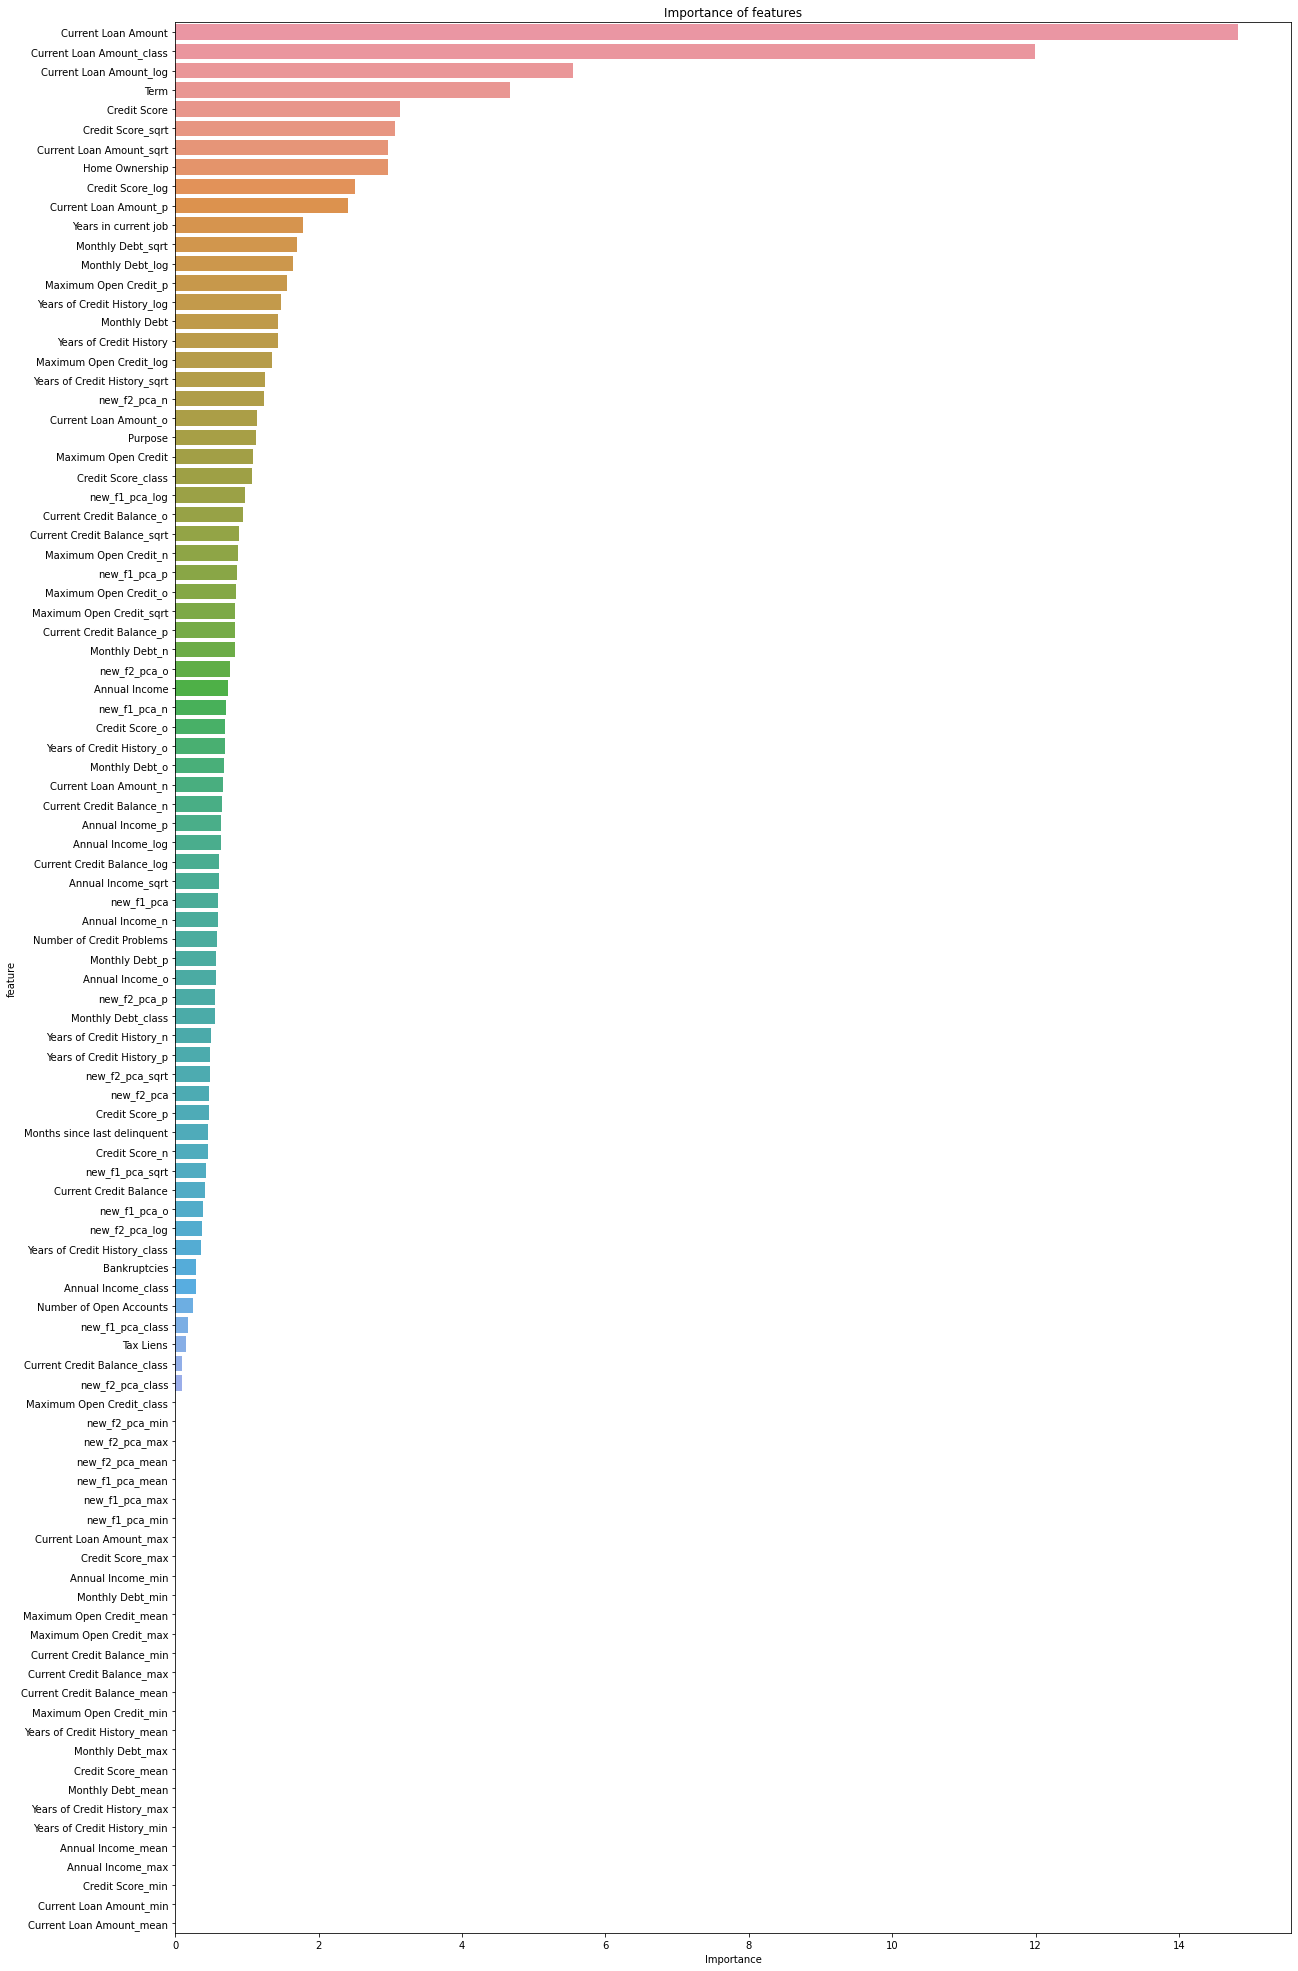

['Current Loan Amount', 'Current Loan Amount_class', 'Current Loan Amount_log', 'Term', 'Credit Score', 'Credit Score_sqrt', 'Current Loan Amount_sqrt', 'Home Ownership', 'Credit Score_log', 'Current Loan Amount_p', 'Years in current job', 'Monthly Debt_sqrt', 'Monthly Debt_log', 'Maximum Open Credit_p', 'Years of Credit History_log', 'Monthly Debt', 'Years of Credit History', 'Maximum Open Credit_log', 'Years of Credit History_sqrt', 'new_f2_pca_n', 'Current Loan Amount_o', 'Purpose', 'Maximum Open Credit', 'Credit Score_class', 'new_f1_pca_log', 'Current Credit Balance_o', 'Current Credit Balance_sqrt', 'Maximum Open Credit_n', 'new_f1_pca_p', 'Maximum Open Credit_o', 'Maximum Open Credit_sqrt', 'Current Credit Balance_p', 'Monthly Debt_n', 'new_f2_pca_o', 'Annual Income', 'new_f1_pca_n', 'Credit Score_o', 'Years of Credit History_o', 'Monthly Debt_o', 'Current Loan Amount_n', 'Current Credit Balance_n', 'Annual Income_p', 'Annual Income_log', 'Current Credit Balance_log', 'Annual In

In [1630]:
important_features_top = show_feature_importances(cbX_train_2.columns, catb_m.feature_importances_, get_top=71)
print(important_features_top)

In [1631]:
cbX_test_2 = cbX_test_2[['Current Loan Amount', 'Current Loan Amount_class', 'Current Loan Amount_log', 'Term', 'Credit Score', 'Credit Score_sqrt', 'Current Loan Amount_sqrt', 'Home Ownership', 'Credit Score_log', 'Current Loan Amount_p', 'Years in current job', 'Monthly Debt_sqrt', 'Monthly Debt_log', 'Maximum Open Credit_p', 'Years of Credit History_log', 'Monthly Debt', 'Years of Credit History', 'Maximum Open Credit_log', 'Years of Credit History_sqrt', 'new_f2_pca_n', 'Current Loan Amount_o', 'Purpose', 'Maximum Open Credit', 'Credit Score_class', 'new_f1_pca_log', 'Current Credit Balance_o', 'Current Credit Balance_sqrt', 'Maximum Open Credit_n', 'new_f1_pca_p', 'Maximum Open Credit_o', 'Maximum Open Credit_sqrt', 'Current Credit Balance_p', 'Monthly Debt_n', 'new_f2_pca_o', 'Annual Income', 'new_f1_pca_n', 'Credit Score_o', 'Years of Credit History_o', 'Monthly Debt_o', 'Current Loan Amount_n', 'Current Credit Balance_n', 'Annual Income_p', 'Annual Income_log', 'Current Credit Balance_log', 'Annual Income_sqrt', 'new_f1_pca', 'Annual Income_n', 'Number of Credit Problems', 'Monthly Debt_p', 'Annual Income_o', 'new_f2_pca_p', 'Monthly Debt_class', 'Years of Credit History_n', 'Years of Credit History_p', 'new_f2_pca_sqrt', 'new_f2_pca', 'Credit Score_p', 'Months since last delinquent', 'Credit Score_n', 'new_f1_pca_sqrt', 'Current Credit Balance', 'new_f1_pca_o', 'new_f2_pca_log', 'Years of Credit History_class', 'Bankruptcies', 'Annual Income_class', 'Number of Open Accounts', 'new_f1_pca_class', 'Tax Liens', 'Current Credit Balance_class', 'new_f2_pca_class']]
cbX_train_2 = cbX_train_2[['Current Loan Amount', 'Current Loan Amount_class', 'Current Loan Amount_log', 'Term', 'Credit Score', 'Credit Score_sqrt', 'Current Loan Amount_sqrt', 'Home Ownership', 'Credit Score_log', 'Current Loan Amount_p', 'Years in current job', 'Monthly Debt_sqrt', 'Monthly Debt_log', 'Maximum Open Credit_p', 'Years of Credit History_log', 'Monthly Debt', 'Years of Credit History', 'Maximum Open Credit_log', 'Years of Credit History_sqrt', 'new_f2_pca_n', 'Current Loan Amount_o', 'Purpose', 'Maximum Open Credit', 'Credit Score_class', 'new_f1_pca_log', 'Current Credit Balance_o', 'Current Credit Balance_sqrt', 'Maximum Open Credit_n', 'new_f1_pca_p', 'Maximum Open Credit_o', 'Maximum Open Credit_sqrt', 'Current Credit Balance_p', 'Monthly Debt_n', 'new_f2_pca_o', 'Annual Income', 'new_f1_pca_n', 'Credit Score_o', 'Years of Credit History_o', 'Monthly Debt_o', 'Current Loan Amount_n', 'Current Credit Balance_n', 'Annual Income_p', 'Annual Income_log', 'Current Credit Balance_log', 'Annual Income_sqrt', 'new_f1_pca', 'Annual Income_n', 'Number of Credit Problems', 'Monthly Debt_p', 'Annual Income_o', 'new_f2_pca_p', 'Monthly Debt_class', 'Years of Credit History_n', 'Years of Credit History_p', 'new_f2_pca_sqrt', 'new_f2_pca', 'Credit Score_p', 'Months since last delinquent', 'Credit Score_n', 'new_f1_pca_sqrt', 'Current Credit Balance', 'new_f1_pca_o', 'new_f2_pca_log', 'Years of Credit History_class', 'Bankruptcies', 'Annual Income_class', 'Number of Open Accounts', 'new_f1_pca_class', 'Tax Liens', 'Current Credit Balance_class', 'new_f2_pca_class']]
cb_test_2 = cb_test_2[['Current Loan Amount', 'Current Loan Amount_class', 'Current Loan Amount_log', 'Term', 'Credit Score', 'Credit Score_sqrt', 'Current Loan Amount_sqrt', 'Home Ownership', 'Credit Score_log', 'Current Loan Amount_p', 'Years in current job', 'Monthly Debt_sqrt', 'Monthly Debt_log', 'Maximum Open Credit_p', 'Years of Credit History_log', 'Monthly Debt', 'Years of Credit History', 'Maximum Open Credit_log', 'Years of Credit History_sqrt', 'new_f2_pca_n', 'Current Loan Amount_o', 'Purpose', 'Maximum Open Credit', 'Credit Score_class', 'new_f1_pca_log', 'Current Credit Balance_o', 'Current Credit Balance_sqrt', 'Maximum Open Credit_n', 'new_f1_pca_p', 'Maximum Open Credit_o', 'Maximum Open Credit_sqrt', 'Current Credit Balance_p', 'Monthly Debt_n', 'new_f2_pca_o', 'Annual Income', 'new_f1_pca_n', 'Credit Score_o', 'Years of Credit History_o', 'Monthly Debt_o', 'Current Loan Amount_n', 'Current Credit Balance_n', 'Annual Income_p', 'Annual Income_log', 'Current Credit Balance_log', 'Annual Income_sqrt', 'new_f1_pca', 'Annual Income_n', 'Number of Credit Problems', 'Monthly Debt_p', 'Annual Income_o', 'new_f2_pca_p', 'Monthly Debt_class', 'Years of Credit History_n', 'Years of Credit History_p', 'new_f2_pca_sqrt', 'new_f2_pca', 'Credit Score_p', 'Months since last delinquent', 'Credit Score_n', 'new_f1_pca_sqrt', 'Current Credit Balance', 'new_f1_pca_o', 'new_f2_pca_log', 'Years of Credit History_class', 'Bankruptcies', 'Annual Income_class', 'Number of Open Accounts', 'new_f1_pca_class', 'Tax Liens', 'Current Credit Balance_class', 'new_f2_pca_class']]

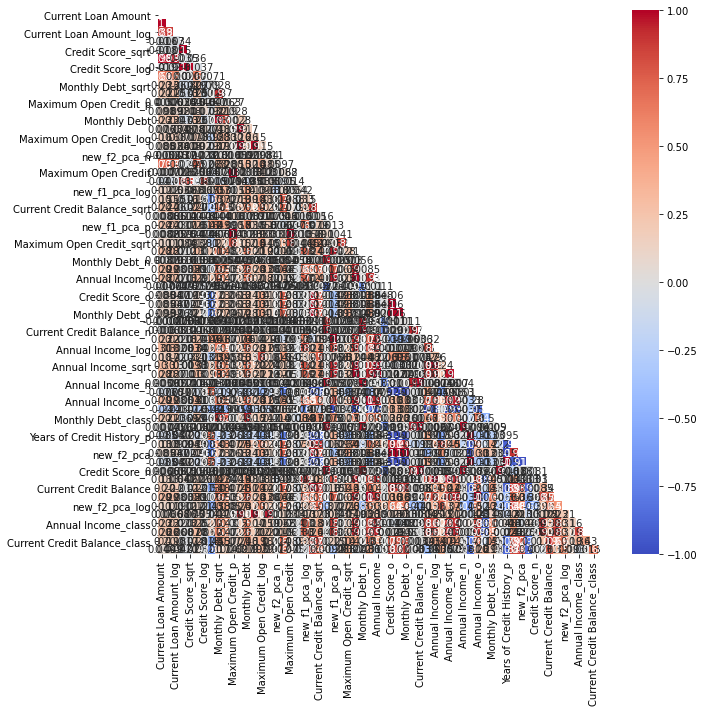

In [1632]:
fig, ax = plt.subplots(figsize=(10,10))
matrix = np.triu(cbX_train_2.corr())
sns.heatmap(cbX_train_2.corr(), annot=True, cmap= 'coolwarm', mask=matrix, ax=ax)

**Обучение и оценка финальной модели**

In [1633]:
names_fields = list(cbX_train_2)
cbX_train_2.corr().shape
list_pos = []
n = 0
list_corr = cbX_train_2.corr().values
for pos in range(cbX_train_2.corr().shape[0]):
    for pos_2 in range(n, cbX_train_2.corr().shape[1]):
        if (list_corr[pos][pos_2] > 0.8) & (pos != pos_2):
            list_pos.append([names_fields[pos],names_fields[pos_2],list_corr[pos][pos_2]])
    n += 1

In [1634]:
list_pos

[['Current Loan Amount', 'Current Loan Amount_class', 0.9951732860146542],
 ['Current Loan Amount', 'Current Loan Amount_log', 0.8857918880149174],
 ['Current Loan Amount', 'Credit Score_sqrt', 0.9801347470940657],
 ['Current Loan Amount_class', 'Current Loan Amount_log', 0.8822429077233686],
 ['Current Loan Amount_class', 'Credit Score_sqrt', 0.9755960671544354],
 ['Current Loan Amount_log', 'Credit Score_sqrt', 0.9571344765468262],
 ['Term', 'Credit Score', 0.9998843080047208],
 ['Term', 'Current Loan Amount_sqrt', 0.9995289138003917],
 ['Term', 'new_f2_pca_n', 0.8536757832465515],
 ['Credit Score', 'Current Loan Amount_sqrt', 0.9998800880641745],
 ['Credit Score', 'new_f2_pca_n', 0.8529231161933364],
 ['Current Loan Amount_sqrt', 'new_f2_pca_n', 0.8519175147978519],
 ['Credit Score_log', 'Current Loan Amount_p', 0.9216619365989613],
 ['Credit Score_log', 'Monthly Debt_log', 0.9692833559447617],
 ['Credit Score_log', 'Annual Income_n', 0.9205352604730335],
 ['Current Loan Amount_p', 

In [1635]:
CAT_FEATURE_NAMES

['Home Ownership',
 'Tax Liens',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Years in current job',
 'Purpose',
 'Term']

In [1659]:
%%time

final_model_ctb_1 = catb.CatBoostClassifier(iterations=6, silent=True, class_weights=[1,2.9], eval_metric="F1",loss_function = "Logloss", colsample_bylevel=0.5, cat_features=[p for p in CAT_FEATURE_NAMES if p in list(cbX_train_2)], depth=9, l2_leaf_reg=12)
final_model_ctb_1.fit(cbX_train_2, y_train)

y_train_pred = final_model_ctb_1.predict(cbX_train_2)
y_test_pred = final_model_ctb_1.predict(cbX_test_2)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.47      0.62      3771
           1       0.39      0.86      0.53      1479

    accuracy                           0.58      5250
   macro avg       0.64      0.66      0.57      5250
weighted avg       0.75      0.58      0.59      5250

TEST

              precision    recall  f1-score   support

           0       0.87      0.46      0.60      1616
           1       0.37      0.83      0.52       634

    accuracy                           0.56      2250
   macro avg       0.62      0.64      0.56      2250
weighted avg       0.73      0.56      0.58      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               739  877
1               108  526
CPU times: user 702 ms, sys: 17.6 ms, total: 720 ms
Wall time: 195 ms


In [1384]:
df_test = pd.concat([cbX_test, y_test], axis=1)
df_test = pd.concat([df_test, pd.Series(data=y_test_pred, index=y_test.index, name="Pred")], axis=1)
f_false = df_test.loc[(df_test['Credit Default'] != df_test['Pred']) & (df_test['Pred'] == 1)]

df_test = pd.concat([cbX_test, y_test], axis=1)
df_test = pd.concat([df_test, pd.Series(data=y_test_pred, index=y_test.index, name="Pred")], axis=1)
f_true = df_test.loc[(df_test['Credit Default'] == df_test['Pred']) & (df_test['Pred'] == 0)]

#(t_false.values * t_false.values.T)^2

f_false.describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000,9.000000e+00,9.000000e+00,9.0,9.0
mean,2.230367e+06,27.444444,1.650997e+06,200774.444444,1.282200e+06,51823.111111,729.121896,1.055190e+06,8.086691e+05,0.0,1.0
std,3.627739e+05,11.881194,7.516271e+05,101123.103769,5.288700e+05,5126.005546,14.277885,4.167512e+05,4.874627e+05,0.0,0.0
min,1.734529e+06,15.600000,6.563920e+05,21714.000000,4.971540e+05,41764.000000,703.000000,5.374366e+05,1.085419e+05,0.0,1.0
25%,1.853450e+06,20.700000,1.056440e+06,173228.000000,8.521690e+05,50446.000000,722.826780,6.606850e+05,4.622043e+05,0.0,1.0
50%,2.289186e+06,23.700000,1.602546e+06,185262.000000,1.213872e+06,51043.000000,728.000000,1.100490e+06,7.134888e+05,0.0,1.0
75%,2.408698e+06,27.000000,2.172786e+06,265826.000000,1.587526e+06,54508.000000,739.310276,1.280555e+06,1.074992e+06,0.0,1.0
max,2.844030e+06,50.000000,2.998908e+06,331056.000000,2.224786e+06,58788.000000,748.000000,1.835130e+06,1.619055e+06,0.0,1.0


In [1388]:
f_true.describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,1.607000e+03,1607.000000,1.607000e+03,1607.000000,1.607000e+03,1607.000000,1607.000000,1.607000e+03,1.607000e+03,1607.0,1607.0
mean,1.386235e+06,18.245613,7.379206e+05,405310.565034,2.899767e+05,18040.242688,724.224728,3.931784e+04,-7.385716e+03,0.0,0.0
std,8.717980e+05,6.901384,1.551363e+06,303696.598852,3.220777e+05,11483.574443,22.522407,8.834333e+05,2.887250e+05,0.0,0.0
min,2.283610e+05,4.500000,0.000000e+00,7825.620000,0.000000e+00,0.000000,601.000000,-1.139615e+06,-1.466865e+06,0.0,0.0
25%,8.904255e+05,13.600000,2.812700e+05,178123.000000,1.153680e+05,10123.500000,715.000000,-4.707547e+05,-1.366185e+05,0.0,0.0
50%,1.190822e+06,16.900000,4.848580e+05,309914.000000,2.100260e+05,15878.000000,730.000000,-1.605214e+05,-4.667293e+04,0.0,0.0
75%,1.622314e+06,21.900000,8.112280e+05,529265.000000,3.651705e+05,23686.000000,740.455115,2.826959e+05,7.515912e+04,0.0,0.0
max,9.338880e+06,49.100000,4.092389e+07,999999.990000,4.249673e+06,110311.000000,751.000000,7.856924e+06,3.648174e+06,0.0,0.0


In [1389]:
df_test = pd.concat([cbX_test, y_test], axis=1)
df_test = pd.concat([df_test, pd.Series(data=y_test_pred, index=y_test.index, name="Pred")], axis=1)
t_false = df_test.loc[(df_test['Credit Default'] != df_test['Pred']) & (df_test['Pred'] == 0)]

df_test = pd.concat([cbX_test, y_test], axis=1)
df_test = pd.concat([df_test, pd.Series(data=y_test_pred, index=y_test.index, name="Pred")], axis=1)
t_true = df_test.loc[(df_test['Credit Default'] == df_test['Pred']) & (df_test['Pred'] == 1)]
t_false.describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,6.310000e+02,631.000000,6.310000e+02,631.000000,6.310000e+02,631.000000,631.000000,6.310000e+02,6.310000e+02,631.0,631.0
mean,1.223043e+06,18.219493,5.744798e+05,313795.929287,2.675781e+05,17864.087163,710.707277,-1.251694e+05,1.304283e+03,1.0,0.0
std,6.956176e+05,7.295355,5.797822e+05,176646.546853,2.383623e+05,10750.596226,30.645338,6.996051e+05,2.265082e+05,0.0,0.0
min,2.401220e+05,5.000000,0.000000e+00,7820.120000,0.000000e+00,0.000000,588.000000,-1.139310e+06,-1.459647e+06,1.0,0.0
25%,8.088227e+05,13.300000,2.592810e+05,177397.000000,1.101240e+05,10340.500000,696.000000,-5.474244e+05,-1.221260e+05,1.0,0.0
50%,1.046463e+06,16.900000,4.250180e+05,270226.000000,2.029580e+05,16286.000000,720.000000,-3.016045e+05,-3.234121e+04,1.0,0.0
75%,1.456990e+06,21.700000,7.145380e+05,433290.000000,3.296405e+05,22886.000000,732.273985,1.257580e+05,9.096802e+04,1.0,0.0
max,8.200229e+06,57.700000,6.148120e+06,781396.000000,2.097353e+06,74588.000000,751.000000,6.698778e+06,1.847176e+06,1.0,0.0


In [1391]:
t_true.describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,3.000000e+00,3.000000,3.000000e+00,3.000000,3.000000e+00,3.000000,3.000000,3.000000e+00,3.000000,3.0,3.0
mean,1.923237e+06,21.866667,1.344361e+06,68495.973333,8.884780e+05,48008.666667,711.666667,6.795055e+05,479711.986297,1.0,1.0
std,8.653654e+05,2.500667,3.831655e+05,62057.197312,3.469564e+05,13767.286455,30.989245,9.125841e+05,191120.963481,0.0,0.0
min,1.231542e+06,19.000000,9.548220e+05,7817.920000,6.694080e+05,32328.000000,676.000000,-3.399050e+04,317022.444433,1.0,1.0
25%,1.438053e+06,21.000000,1.156133e+06,36820.960000,6.884650e+05,42956.500000,701.500000,1.653480e+05,374471.211878,1.0,1.0
50%,1.644564e+06,23.000000,1.357444e+06,65824.000000,7.075220e+05,53585.000000,727.000000,3.646865e+05,431919.979324,1.0,1.0
75%,2.269084e+06,23.300000,1.539131e+06,98835.000000,9.980130e+05,55849.000000,729.500000,1.036254e+06,561056.757230,1.0,1.0
max,2.893605e+06,23.600000,1.720818e+06,131846.000000,1.288504e+06,58113.000000,732.000000,1.707821e+06,690193.535135,1.0,1.0


In [1392]:
df_test.loc[(df_test['Credit Default'] == df_test['Pred']) & (df_test['Pred'] == 0)].describe()

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,new_f1_pca,new_f2_pca,Credit Default,Pred
count,1.607000e+03,1607.000000,1.607000e+03,1607.000000,1.607000e+03,1607.000000,1607.000000,1.607000e+03,1.607000e+03,1607.0,1607.0
mean,1.386235e+06,18.245613,7.379206e+05,405310.565034,2.899767e+05,18040.242688,724.224728,3.931784e+04,-7.385716e+03,0.0,0.0
std,8.717980e+05,6.901384,1.551363e+06,303696.598852,3.220777e+05,11483.574443,22.522407,8.834333e+05,2.887250e+05,0.0,0.0
min,2.283610e+05,4.500000,0.000000e+00,7825.620000,0.000000e+00,0.000000,601.000000,-1.139615e+06,-1.466865e+06,0.0,0.0
25%,8.904255e+05,13.600000,2.812700e+05,178123.000000,1.153680e+05,10123.500000,715.000000,-4.707547e+05,-1.366185e+05,0.0,0.0
50%,1.190822e+06,16.900000,4.848580e+05,309914.000000,2.100260e+05,15878.000000,730.000000,-1.605214e+05,-4.667293e+04,0.0,0.0
75%,1.622314e+06,21.900000,8.112280e+05,529265.000000,3.651705e+05,23686.000000,740.455115,2.826959e+05,7.515912e+04,0.0,0.0
max,9.338880e+06,49.100000,4.092389e+07,999999.990000,4.249673e+06,110311.000000,751.000000,7.856924e+06,3.648174e+06,0.0,0.0


#Current Loan Amount - Ошибка при малых значениях.
#Credit Score - Завышенные значения попали в положительный результат
#Credit Default - В положительные попали больше 0 примеры - 75% 

In [1664]:
xgbX_train_2 = cbX_train_2.copy()
xgbX_test_2 = cbX_test_2.copy()

for col in CAT_FEATURE_NAMES:
    xgbX_train_2[col] = xgbX_train_2[col].astype('int')
    xgbX_test_2[col] = xgbX_test_2[col].astype('int')

In [1665]:
final_model_xgb_1 = xgb.XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.01,random_state=21)
final_model_xgb_1.fit(xgbX_train_2, y_train)

y_train_pred = final_model_xgb_1.predict(xgbX_train_2)
y_test_pred = final_model_xgb_1.predict(xgbX_test_2)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3771
           1       0.85      0.33      0.48      1479

    accuracy                           0.80      5250
   macro avg       0.82      0.65      0.67      5250
weighted avg       0.81      0.80      0.76      5250

TEST

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1616
           1       0.54      0.19      0.28       634

    accuracy                           0.73      2250
   macro avg       0.64      0.56      0.56      2250
weighted avg       0.69      0.73      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1515  101
1                514  120


In [1394]:
y_train_pred_xgb_1 = final_model_xgb_1.predict_proba(xgbX_train)
y_test_pred_xgb_1 = final_model_xgb_1.predict_proba(xgbX_test)
y_test_pred_xgb_1

array([[0.82568157, 0.1743184 ],
       [0.7757882 , 0.22421184],
       [0.7516222 , 0.24837781],
       ...,
       [0.84582937, 0.15417066],
       [0.72455645, 0.27544358],
       [0.47705173, 0.52294827]], dtype=float32)

In [1666]:
final_model_lr_1 = LogisticRegression()
final_model_lr_1.fit(xgbX_train, y_train)

y_train_pred = final_model_lr_1.predict(xgbX_train)
y_test_pred = final_model_lr_1.predict(xgbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      3771
           1       0.32      0.00      0.01      1479

    accuracy                           0.72      5250
   macro avg       0.52      0.50      0.42      5250
weighted avg       0.61      0.72      0.60      5250

TEST

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1616
           1       0.25      0.00      0.01       634

    accuracy                           0.72      2250
   macro avg       0.48      0.50      0.42      2250
weighted avg       0.59      0.72      0.60      2250

CONFUSION MATRIX

col_0              0  1
Credit Default         
0               1607  9
1                631  3


In [1396]:
y_train_pred_lr_1 = final_model_lr_1.predict_proba(xgbX_train)
y_test_pred_lr_1 = final_model_lr_1.predict_proba(xgbX_test)

In [1667]:
final_model_knn_1 = KNeighborsClassifier()
final_model_knn_1.fit(xgbX_train, y_train)

y_train_pred = final_model_knn_1.predict(xgbX_train)
y_test_pred = final_model_knn_1.predict(xgbX_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3771
           1       0.65      0.41      0.50      1479

    accuracy                           0.77      5250
   macro avg       0.72      0.66      0.68      5250
weighted avg       0.76      0.77      0.75      5250

TEST

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1616
           1       0.38      0.24      0.29       634

    accuracy                           0.67      2250
   macro avg       0.56      0.54      0.54      2250
weighted avg       0.64      0.67      0.65      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1365  251
1                482  152


In [1398]:
y_train_pred_knn_1 = final_model_knn_1.predict_proba(xgbX_train)
y_test_pred_knn_1 = final_model_knn_1.predict_proba(xgbX_test)

Выбираем модель CatBoost

In [1673]:
y_validate_pred = final_model_ctb_1.predict(cb_test_2)
index = cb_test_2.index

In [1676]:
validation_pred = pd.DataFrame({'ID':index, 'NEXT_MONTH_DEFAULT':y_validate_pred})

In [1677]:
validation_pred.to_csv(VALIDATION_PATH, index=False, encoding='utf-8')

NameError: name 'VALIDATION_PATH' is not defined